In [2]:
import matplotlib.pyplot as plt
import numpy as np

from ModelClass import RegressionModel
from DatasetClass import DatasetPt
from src.helpers import pick_only_target, extract_data

# === 1. Načítaj dáta (z validácie) ===
erik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*H125*.root"
dataset = DatasetPt(file_paths=erik_data)
dataset.load_data()  # musíš mať uložený dataset v priečinku "data/"

# === 2. Inicializuj model a načítaj ho z disku ===
model = RegressionModel(dataset=dataset)
# model.prepare_dataset()
model.load()  # načíta z "models/mlp_regression_model.keras"

# === 4. Spusti predikciu (vráti NumPy array) ===
y_pred = model.model.predict(dataset.val_dataset.batch(100000)).flatten()

# === 5. Získaj pravé hodnoty z validačného datasetu
y_true = np.array(extract_data(dataset.val_dataset.map(pick_only_target))).flatten()


# print("y_pred shape:", y_pred.shape)
# print("y_true shape:", y_true.shape)

# print("y_pred min/max:", np.min(y_pred), np.max(y_pred))
# print("y_true min/max:", np.min(y_true), np.max(y_true))

# print("y_pred nan?", np.isnan(y_pred).any())
# print("y_true nan?", np.isnan(y_true).any())


Model loaded from /home/kvake/HiggsAnalysisBc/models/PtNet.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step


2025-04-19 22:39:56.357453: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
print("y_pred shape:", y_pred.shape)
print("y_true shape:", y_true.shape)

y_pred shape: (815463,)
y_true shape: (815463,)


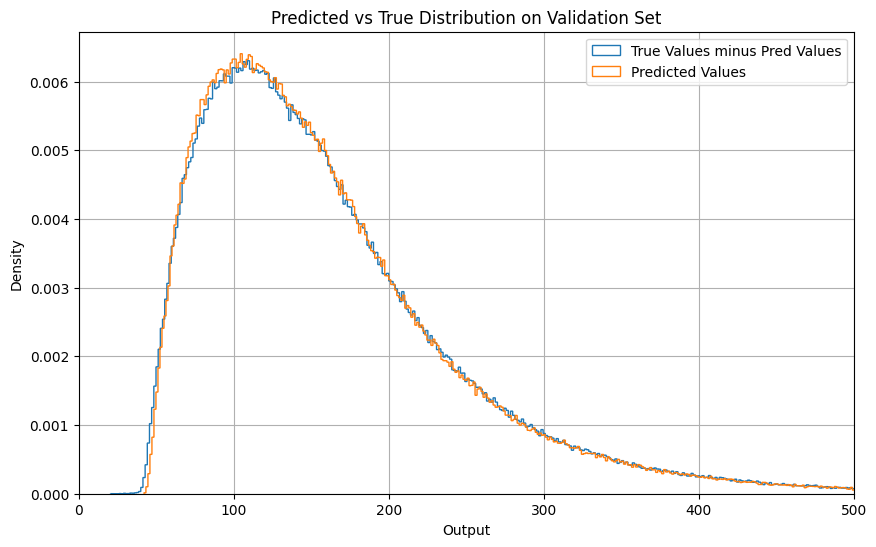

In [9]:

plt.figure(figsize=(10, 6))
plt.hist(y_true, bins=1000, histtype='step', label='True Values minus Pred Values', density=True)
plt.hist(y_pred, bins=1000, histtype='step', label='Predicted Values', density=True)
plt.xlabel("Output")
plt.ylabel("Density")
plt.title("Predicted vs True Distribution on Validation Set")
# plt.xlim(-70, 70)
plt.xlim(0,500)
plt.legend()
plt.grid(True)
# plt.savefig("predicted_vs_true_distribution.png", dpi=300)

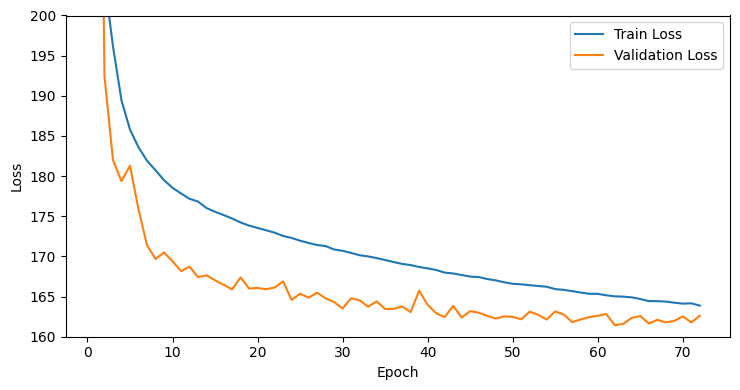

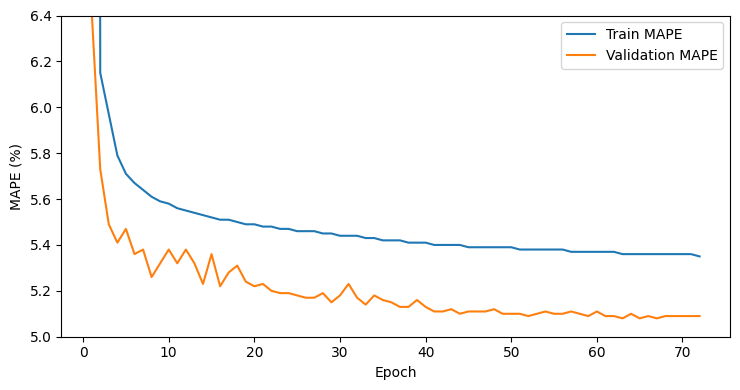

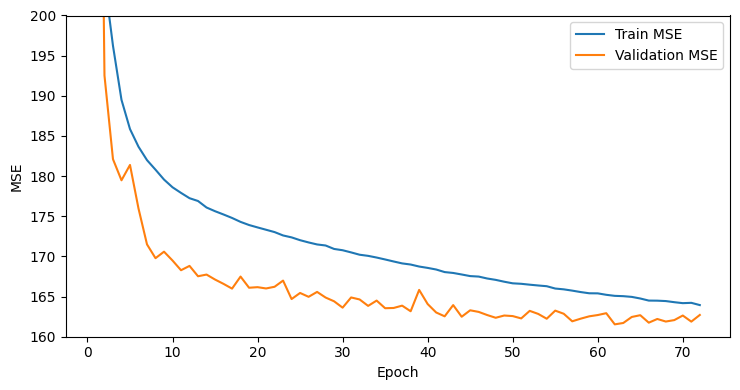

In [1]:
import matplotlib.pyplot as plt
import re

# Zmenená cesta k súboru na 'train_history.txt'
file_path = 'train_history_pt_mmc.txt'

epochs = []
train_losses = []
val_losses = []
train_mapes = []
val_mapes = []
train_mses = []
val_mses = []


try:
    with open(file_path, 'r') as f:
        for line in f:
            # Regulárny výraz pre extrakciu všetkých metrík z riadku
            match = re.search(r'\[Epoch (\d+)\] LR: [\d\.e-]+ \| Train loss: ([\d\.]+), MAPE: ([\d\.]+), MSE: ([\d\.]+) \| Val loss: ([\d\.]+), MAPE: ([\d\.]+), MSE: ([\d\.]+)', line)
            if match:
                epoch = int(match.group(1))
                train_loss = float(match.group(2))
                train_mape = float(match.group(3))
                train_mse = float(match.group(4))
                val_loss = float(match.group(5))
                val_mape = float(match.group(6))
                val_mse = float(match.group(7))

                epochs.append(epoch)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                train_mapes.append(train_mape)
                val_mapes.append(val_mape)
                train_mses.append(train_mse)
                val_mses.append(val_mse)

    if not epochs:
        print("Súbor bol úspešne prečítaný, ale neboli nájdené žiadne relevantné dáta. Skontrolujte formát logu.")
    else:
        # Vykreslenie grafu pre Loss
        plt.figure(figsize=(7.5, 4))
        plt.plot(epochs, train_losses, label='Train Loss', linestyle='-')
        plt.plot(epochs, val_losses, label='Validation Loss', linestyle='-')
        # plt.title('Train Loss and Validation Loss vs. Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.ylim(160,200)
        plt.grid(False)
        plt.legend()
        plt.tight_layout()
        plt.savefig("train_history.png")
        plt.show()
        

        # Vykreslenie grafu pre MAPE (Mean Absolute Percentage Error)
        plt.figure(figsize=(7.5, 4))
        plt.plot(epochs, train_mapes, label='Train MAPE', linestyle='-')
        plt.plot(epochs, val_mapes, label='Validation MAPE', linestyle='-')
        # plt.title('Train MAPE and Validation MAPE vs. Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('MAPE (%)')
        plt.ylim(5,6.40)
        plt.grid(False)
        plt.legend()
        plt.tight_layout()
        plt.savefig("train_history_MAPE.png")
        plt.show()
        

        # Vykreslenie grafu pre MSE (Mean Squared Error)
        plt.figure(figsize=(7.5, 4))
        plt.plot(epochs, train_mses, label='Train MSE', linestyle='-')
        plt.plot(epochs, val_mses, label='Validation MSE', linestyle='-')
        # plt.title('Train MSE and Validation MSE vs. Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
        plt.ylim(160,200)
        plt.grid(False)
        plt.legend()
        plt.tight_layout()
        plt.savefig("train_history_MSE.png")
        plt.show()
        

except FileNotFoundError:
    print(f"Chyba: Súbor '{file_path}' nebol nájdený. Uistite sa, že súbor je v rovnakom adresári ako skript, alebo zadajte správnu cestu.")
except Exception as e:
    print(f"Nastala chyba pri spracovaní súboru: {e}")

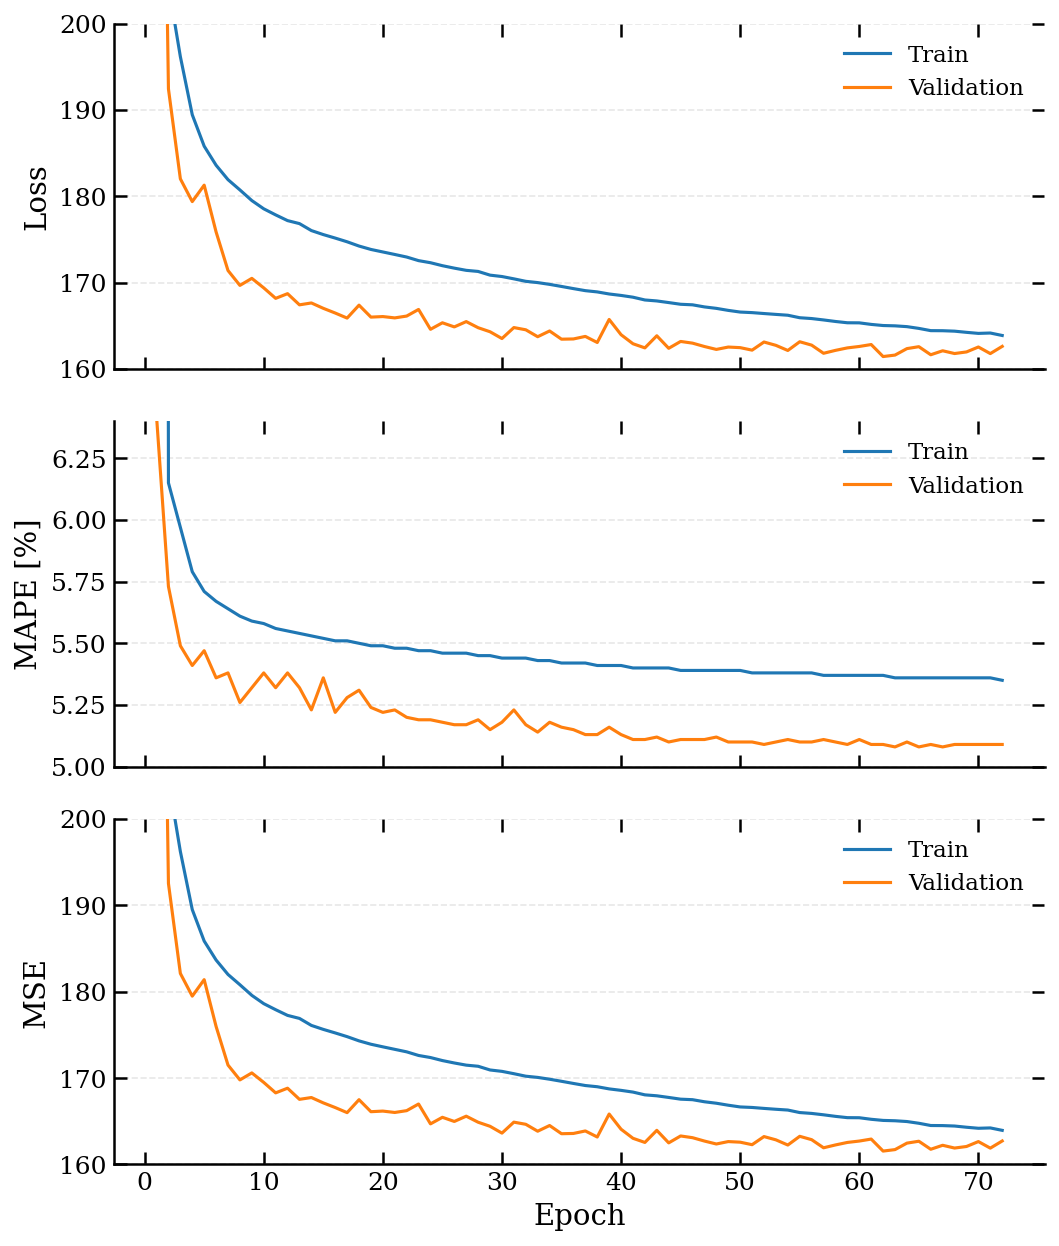

In [22]:
import matplotlib.pyplot as plt
import re

file_path = 'train_history_pt_mmc.txt'

epochs = []
train_losses = []
val_losses = []
train_mapes = []
val_mapes = []
train_mses = []
val_mses = []

with open(file_path, 'r') as f:
    for line in f:
        match = re.search(r'\[Epoch (\d+)\] LR: [\d\.e-]+ \| Train loss: ([\d\.]+), MAPE: ([\d\.]+), MSE: ([\d\.]+) \| Val loss: ([\d\.]+), MAPE: ([\d\.]+), MSE: ([\d\.]+)', line)
        if match:
            epochs.append(int(match.group(1)))
            train_losses.append(float(match.group(2)))
            train_mapes.append(float(match.group(3)))
            train_mses.append(float(match.group(4)))
            val_losses.append(float(match.group(5)))
            val_mapes.append(float(match.group(6)))
            val_mses.append(float(match.group(7)))

# ML štýl (NeurIPS-like)
plt.rcParams.update({
    "font.size": 13,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--",
    "lines.linewidth": 2,
    "legend.frameon": False
})

fig, axs = plt.subplots(3, 1, figsize=(7.2, 8.5), sharex=True)

# (1) LOSS
axs[0].plot(epochs, train_losses, label="Train", linewidth=1.5)
axs[0].plot(epochs, val_losses, label="Validation",linewidth=1.5)
axs[0].set_ylabel("Loss")
axs[0].set_ylim(160, 200)
axs[0].legend(loc="upper right")
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].xaxis.grid(False)

# (2) MAPE
axs[1].plot(epochs, train_mapes, label="Train",linewidth=1.5)
axs[1].plot(epochs, val_mapes, label="Validation",linewidth=1.5)
axs[1].set_ylabel("MAPE [%]")
axs[1].set_ylim(5.0, 6.4)
axs[1].legend(loc="upper right")
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].xaxis.grid(False)

# (3) MSE
axs[2].plot(epochs, train_mses, label="Train",linewidth=1.5)
axs[2].plot(epochs, val_mses, label="Validation",linewidth=1.5)
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("MSE")
axs[2].set_ylim(160, 200)
axs[2].legend(loc="upper right")
axs[2].spines["top"].set_visible(False)
axs[2].spines["right"].set_visible(False)
axs[2].xaxis.grid(False)

plt.tight_layout()
plt.savefig("training_history_mlstyle.pdf", bbox_inches="tight", dpi=300)
